In [11]:
# Installing the required libraries 
!pip install prophet

  Using cached prophet-1.1.5-py3-none-macosx_11_0_arm64.whl.metadata (3.5 kB)
  Using cached cmdstanpy-1.2.4-py3-none-any.whl.metadata (4.1 kB)
  Using cached importlib_resources-6.4.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.5-py3-none-macosx_11_0_arm64.whl (8.2 MB)
Using cached cmdstanpy-1.2.4-py3-none-any.whl (94 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:0000:0100:01
Using cached importlib_resources-6.4.4-py3-none-any.whl (35 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)


In [12]:
# Importing required libraries and dependencies 
import pandas as pd
import datetime as dt 
import numpy as np
from prophet import Prophet 
import matplotlib.pyplot as plt


In [13]:
# File Path For CSV
file_path = "../Resources/Economy_Data.csv"

In [14]:
# Reading the Ecomonic Data file into a Pandas DataFrame 
economic_data = pd.read_csv(file_path, delimiter=";").dropna()

# Displaying the first five rows of the Data Frame
economic_data.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11
10,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Brazil,BRA,1970.0,3.786021e+10
11,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,China,CHN,1970.0,8.525561e+10
12,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,India,IND,1970.0,5.776720e+10


In [15]:
# Filtering the data to only show the years 2009-2019 (We wanted to focus on the past 10 years and this was the most recent 10 year period)
filtered_economic_data = economic_data[(economic_data["Year"] >= 2009) & (economic_data["Year"] <=2019)]

# Displaying the first five rows of the filtered Data Frame  
filtered_economic_data.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
67470,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2009.0,5.421578
67471,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2009.0,13.262097
67472,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2009.0,9.589941
67473,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2009.0,-17.518426
67474,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2009.0,4.761918


In [16]:
# Filtering The Data for Adjusted Net National Income
net_national_income_all = filtered_economic_data[filtered_economic_data["SeriesName"].str.contains("Adjusted net national income", case=False)]

# Viewing the first five rows of the net_national_income_all Data Frame 
net_national_income_all.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
67470,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2009.0,5.421578
67471,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2009.0,13.262097
67472,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2009.0,9.589941
67473,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2009.0,-17.518426
67474,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2009.0,4.761918


In [17]:
# Grouping by "CountryName" and "Year" then calculating the mean for annual % growth 
group_net_national_income = net_national_income_all.groupby(["CountryName", "Year"])["Value"].mean().reset_index()

# Displaying the first five rows of the filtered Data Frame 
group_net_national_income.head()

,CountryName,Year,Value
0,Brazil,2009.0,5.249900e+11
1,Brazil,2010.0,6.095448e+11
2,Brazil,2011.0,6.824218e+11
3,Brazil,2012.0,6.709171e+11
4,Brazil,2013.0,6.915997e+11


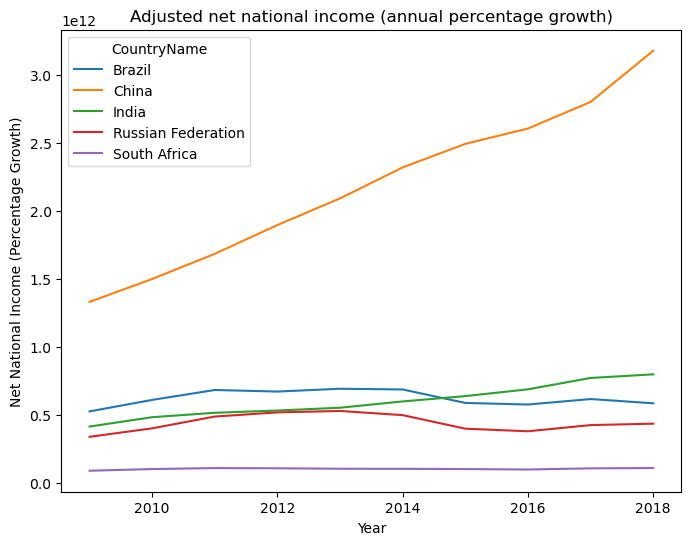

In [18]:
# Creating a line plot to show the Adjusted net national income
group_net_national_income.pivot(index="Year", columns="CountryName", values="Value").plot(kind="line", figsize=(8,6))

# Setting titles and labels
plt.title("Adjusted net national income (annual percentage growth)")
plt.xlabel("Year")
plt.ylabel("Net National Income (Percentage Growth)")
plt.show()

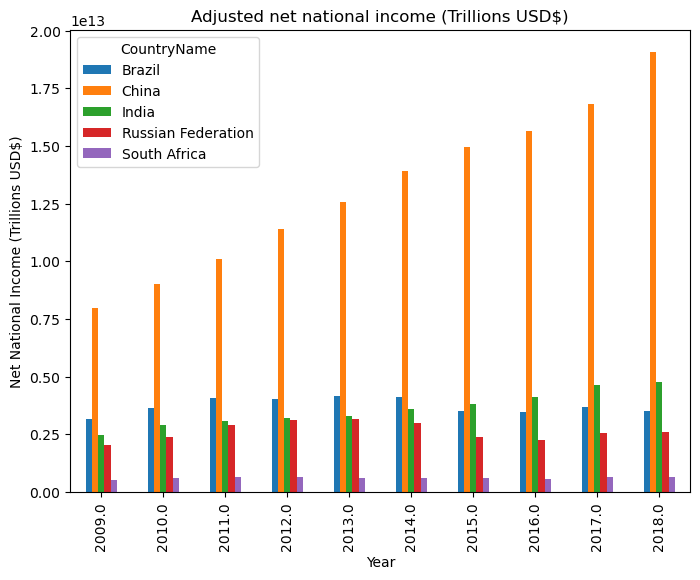

In [19]:
# Grouping by "CountryName" and "Year" then calculating the sum for annual % growth 
grouped_net_income_dollar_amount = net_national_income_all.groupby(["CountryName", "Year",])["Value"].sum().reset_index()

# Creating a bar graph to show the Adjusted net national income in dollar amount 
grouped_net_income_dollar_amount.pivot(index="Year", columns="CountryName", values="Value").plot(kind="bar", figsize=(8,6))

# Setting titles and labels
plt.title("Adjusted net national income (Trillions USD$)")
plt.xlabel("Year")
plt.ylabel("Net National Income (Trillions USD$)")
plt.show()

In [20]:
# Filtering The Data for Adjusted Net National Income Per Capita 
net_national_income_per_capita = filtered_economic_data[filtered_economic_data["SeriesName"].str.contains("Adjusted net national income per capita", case=False)]

# Displaying the first few rows of Adjusted Net National Income Per Capita Data Frame
net_national_income_per_capita.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
67485,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,Brazil,BRA,2009.0,4.412339
67486,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,China,CHN,2009.0,12.700151
67487,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,India,IND,2009.0,8.054936
67488,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,Russian Federation,RUS,2009.0,-17.543367
67489,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,South Africa,ZAF,2009.0,3.314216


In [21]:
# Grouping by "CountryName" and "Year" then calculating the mean for annual % growth 
group_net_national_income_per_capita = net_national_income_per_capita.groupby(["CountryName", "Year"])["Value"].mean().reset_index()

# Displaying the first five rows of the filtered Data Frame 
group_net_national_income_per_capita.head()

,CountryName,Year,Value
0,Brazil,2009.0,5416.906622
1,Brazil,2010.0,6230.325283
2,Brazil,2011.0,6911.520057
3,Brazil,2012.0,6733.691199
4,Brazil,2013.0,6881.492682


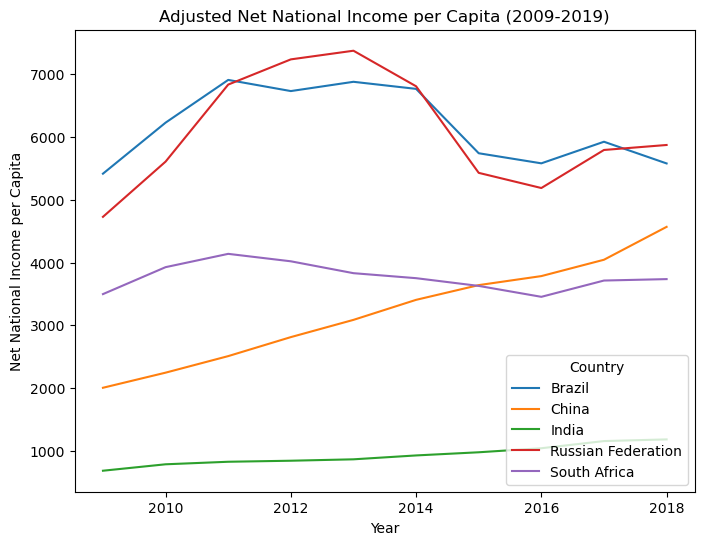

In [22]:
# Creating a line plot to show the Adjusted net national income per capita
group_net_national_income_per_capita.pivot(index="Year", columns="CountryName", values="Value").plot(kind="line", figsize=(8,6))

# Setting titles and labels
plt.title("Adjusted Net National Income per Capita (2009-2019)")
plt.xlabel("Year")
plt.ylabel("Net National Income per Capita")
plt.legend(title="Country", loc="lower right")
plt.show()

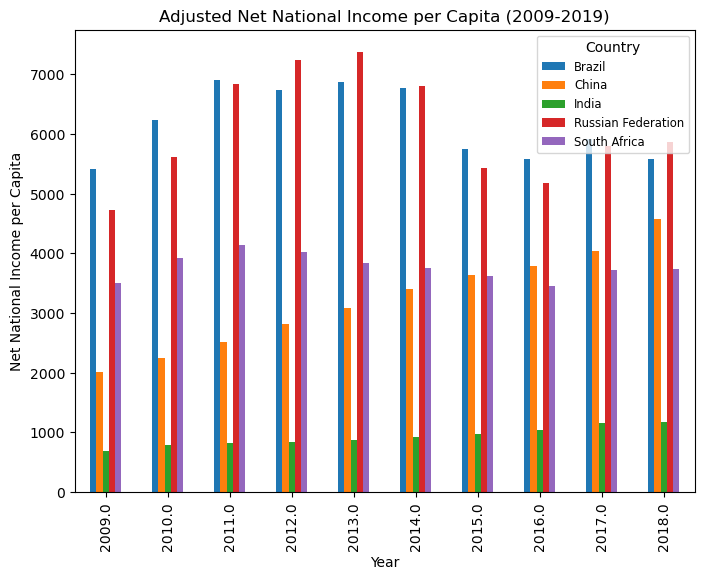

In [23]:
# Creating a bar graph to show the Adjusted net national income per capita
group_net_national_income_per_capita.pivot(index="Year", columns="CountryName", values="Value").plot(kind="bar", figsize=(8,6))

# Setting titles and labels
plt.title("Adjusted Net National Income per Capita (2009-2019)")
plt.xlabel("Year")
plt.ylabel("Net National Income per Capita")
plt.legend(title="Country", loc="upper right", fontsize="small")
plt.show()

In [24]:
# Filtering The Data for Agriculture, forestry, and fishing, value added
agriculture_forestry_fishing = filtered_economic_data[filtered_economic_data["SeriesName"].str.contains('Agriculture, forestry, and fishing, value added (annual % growth)', case=False, regex=False)]

agriculture_forestry_fishing.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
67615,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD.ZG,Brazil,BRA,2009.0,-3.728680
67616,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD.ZG,China,CHN,2009.0,3.995766
67617,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD.ZG,India,IND,2009.0,-0.880233
67618,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD.ZG,Russian Federation,RUS,2009.0,1.680506
67619,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.KD.ZG,South Africa,ZAF,2009.0,-1.892282


In [25]:
# Grouping by "CountryName" and "Year" then calculating the mean for annual % growth for agriculture 
group_agriculture_forestry_fishing = agriculture_forestry_fishing.groupby(["CountryName", "Year"])["Value"].mean().reset_index()

# Displaying the first five rows of the filtered Data Frame 
group_agriculture_forestry_fishing.head()

,CountryName,Year,Value
0,Brazil,2009.0,-3.728680
1,Brazil,2010.0,6.696942
2,Brazil,2011.0,5.638646
3,Brazil,2012.0,-3.082242
4,Brazil,2013.0,8.361444


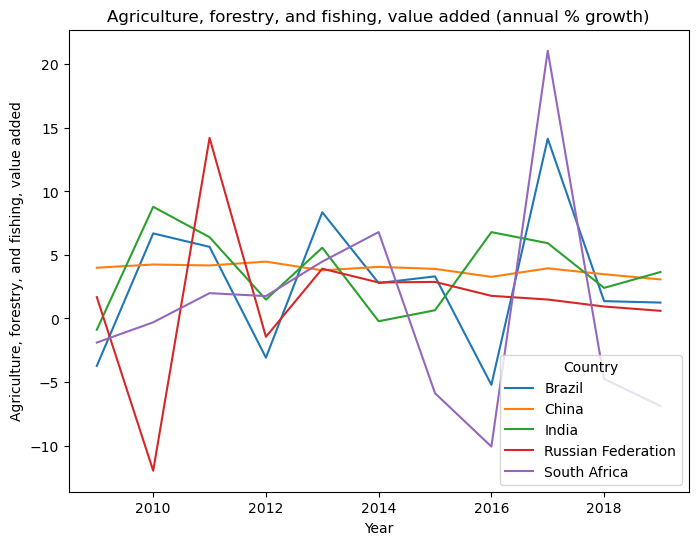

In [26]:
# Creating a line plot to show the data for Agriculture, forestry, and fishing, value added
group_agriculture_forestry_fishing.pivot(index="Year", columns="CountryName", values="Value").plot(kind="line", figsize=(8,6))

# Setting titles and labels
plt.title("Agriculture, forestry, and fishing, value added (annual % growth)")
plt.xlabel("Year")
plt.ylabel("Agriculture, forestry, and fishing, value added")
plt.legend(title="Country", loc="lower right")
plt.show()

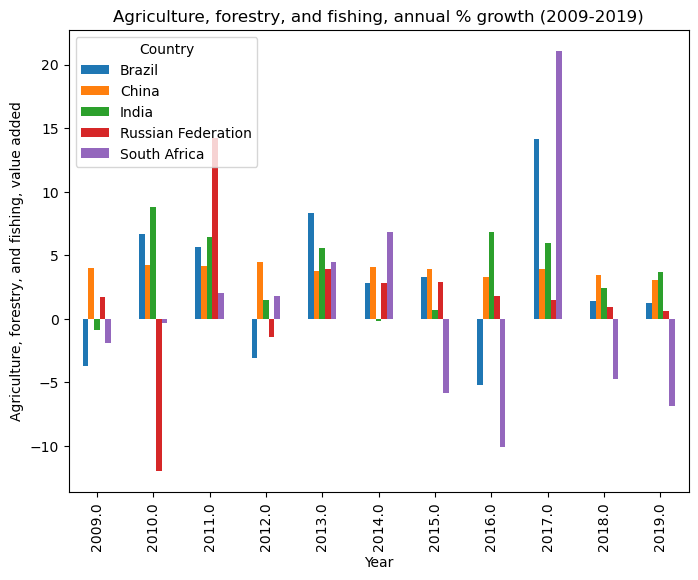

In [90]:
# Creating a bar graph to show the data for Agriculture, forestry, and fishing, value added (annual % growth)
group_agriculture_forestry_fishing.pivot(index="Year", columns="CountryName", values="Value").plot(kind="bar", figsize=(8,6))

# Setting titles and labels
plt.title("Agriculture, forestry, and fishing, annual % growth (2009-2019)")
plt.xlabel("Year")
plt.ylabel("Agriculture, forestry, and fishing, value added")
plt.legend(title="Country", loc="upper left")
plt.show()

In [30]:
# Filtering The Data for GDP (constant 2010 US$)
gdp = filtered_economic_data[filtered_economic_data["SeriesName"].str.contains("GDP (constant 2010 US$)", case=False, regex=False)]

# Showing the first five results of the Data Frame 
gdp.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
67890,GDP (constant 2010 US$),NY.GDP.MKTP.KD,Brazil,BRA,2009.0,2.054225e+12
67891,GDP (constant 2010 US$),NY.GDP.MKTP.KD,China,CHN,2009.0,5.501968e+12
67892,GDP (constant 2010 US$),NY.GDP.MKTP.KD,India,IND,2009.0,1.544380e+12
67893,GDP (constant 2010 US$),NY.GDP.MKTP.KD,Russian Federation,RUS,2009.0,1.459251e+12
67894,GDP (constant 2010 US$),NY.GDP.MKTP.KD,South Africa,ZAF,2009.0,3.642764e+11


In [32]:
groupby_gdp = gdp.groupby(["CountryName", "Year"])["Value"].sum().reset_index()

groupby_gdp.head()


,CountryName,Year,Value
0,Brazil,2009.0,2.054225e+12
1,Brazil,2010.0,2.208872e+12
2,Brazil,2011.0,2.296662e+12
3,Brazil,2012.0,2.340784e+12
4,Brazil,2013.0,2.411121e+12


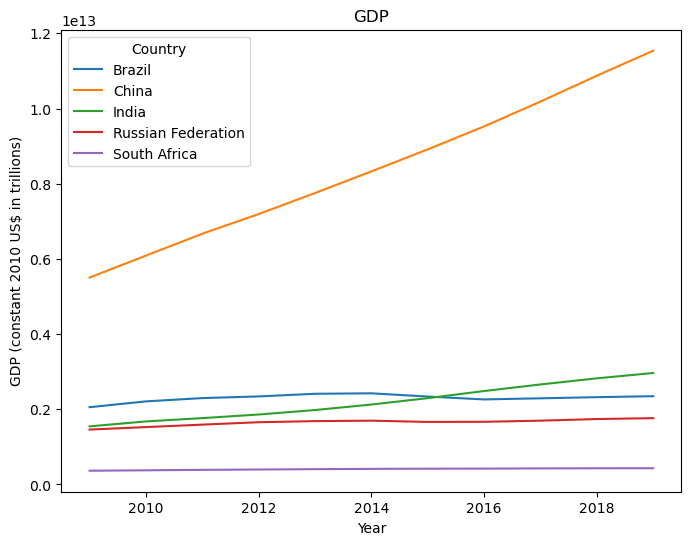

In [36]:
groupby_gdp.pivot(index="Year", columns="CountryName", values="Value").plot(kind="line", figsize=(8,6))

# Setting titles and labels
plt.title("GDP")
plt.xlabel("Year")
plt.ylabel("GDP (constant 2010 US$ in trillions)")
plt.legend(title="Country", loc="upper left")
plt.show()

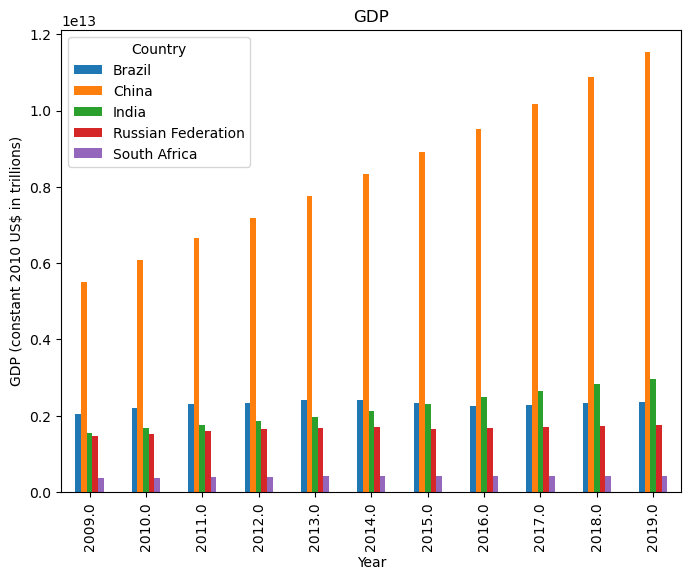

In [37]:
groupby_gdp.pivot(index="Year", columns="CountryName", values="Value").plot(kind="bar", figsize=(8,6))

# Setting titles and labels
plt.title("GDP")
plt.xlabel("Year")
plt.ylabel("GDP (constant 2010 US$ in trillions)")
plt.legend(title="Country", loc="upper left")
plt.show()